In [112]:
import sys
import warnings

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm
from itertools import combinations
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

from statannotations.Annotator import Annotator

sb.set_theme(style="ticks", context="paper")

results_dir = "../results/"
out_dir = f"{results_dir}datasets/"

In [113]:
xgi.load_xgi_data()

Available datasets are the following:
coauth-dblp
coauth-mag-geology
coauth-mag-history
congress-bills
contact-high-school
contact-primary-school
dawn
diseasome
disgenenet
email-enron
email-eu
hospital-lyon
hypertext-conference
invs13
invs15
kaggle-whats-cooking
malawi-village
ndc-classes
ndc-substances
science-gallery
sfhh-conference
tags-ask-ubuntu
tags-math-sx
tags-stack-overflow


In [114]:
len(dataset_categories)

24

In [149]:
dataset_categories = {
    "coauth-mag-geology_1980": "coauthorship",
    "coauth-mag-geology_1981": "coauthorship",
    "coauth-mag-geology_1982": "coauthorship",
    "coauth-mag-geology_1983": "coauthorship",
    "coauth-mag-geology_1988": "coauthorship",
    "coauth-dblp": "coauthorship",
    "coauth-mag-geology": "coauthorship",
    "coauth-mag-history": "coauthorship",
    "congress-bills": "other",
    "contact-high-school": "contact",
    "contact-primary-school": "contact",
    "dawn": "bio",
    "diseasome": "bio",
    "disgenenet": "bio",
    "email-enron": "technology",
    "email-eu": "technology",
    "hospital-lyon": "contact",
    "hypertext-conference": "contact",
    "invs13": "contact",
    "invs15": "contact",
    "kaggle-whats-cooking": "other",
    "malawi-village": "contact",
    "ndc-classes": "bio",
    "ndc-substances": "bio",
    "science-gallery": "contact",
    "sfhh-conference": "contact",
    "tags-ask-ubuntu": "technology",
    "tags-math-sx": "technology",
    "tags-stack-overflow": "technology"
}


## load dataset

In [150]:
stats = {}

datasets = [
    "coauth-mag-geology_1980",
    "coauth-mag-geology_1981",
    "coauth-mag-geology_1982",
    "coauth-mag-geology_1983",
    "coauth-mag-geology_1988",
    #"coauth-dblp",
    #"coauth-mag-geology",
    #"coauth-mag-history",
    "congress-bills",
    "contact-high-school",
    "contact-primary-school",
    "dawn",
    #"diseasome",
    #"disgenenet",
    "email-enron",
    "email-eu",
    "hospital-lyon",
    "hypertext-conference",
    "invs13",
    "invs15",
    "kaggle-whats-cooking",
    "malawi-village",
    "ndc-classes",
    "ndc-substances",
    "science-gallery",
    "sfhh-conference",
    "tags-ask-ubuntu",
    "tags-math-sx",
    #"tags-stack-overflow"
]

for name in datasets:
    
    stats[name] = {}
    
    #name = "hypertext-conference"
    data = np.load(f"{out_dir}/message_length_{name}.npz")

    stats[name] = data
    

In [151]:
stats_df = pd.DataFrame.from_dict(stats, orient="index")
stats_df["max_order"] = stats_df["orders"].apply(max)
stats_df["dataset"] = stats_df["dataset"].astype(str)
stats_df["N"] = stats_df["N"].astype(int)
stats_df["num_edges"] = stats_df["num_edges"].astype(int)
stats_df["order_min"] = stats_df["order_min"].astype(int)

# stats_df

In [152]:
stats_df = stats_df[["dataset", "N", "num_edges", "max_order", "order_min"]]

def reducibility(max_order, order_min):
    return (max_order - order_min) / (max_order - 1)

stats_df["reduce"] = stats_df.apply(lambda x: reducibility(x["max_order"], x["order_min"]), axis=1)
stats_df["category"] = stats_df['dataset'].map(dataset_categories)

stats_df

,dataset,N,num_edges,max_order,order_min,reduce,category
coauth-mag-geology_1980,coauth-mag-geology_1980,1350,657,17,17,0.000000,coauthorship
coauth-mag-geology_1981,coauth-mag-geology_1981,464,233,17,17,0.000000,coauthorship
coauth-mag-geology_1982,coauth-mag-geology_1982,1331,622,17,17,0.000000,coauthorship
coauth-mag-geology_1983,coauth-mag-geology_1983,535,245,14,14,0.000000,coauthorship
coauth-mag-geology_1988,coauth-mag-geology_1988,4668,2177,24,24,0.000000,coauthorship
congress-bills,congress-bills,1718,104039,399,399,0.000000,other
contact-high-school,contact-high-school,327,7818,4,3,0.333333,contact
contact-primary-school,contact-primary-school,242,12704,4,2,0.666667,contact
dawn,dawn,2290,138742,15,1,1.000000,bio
email-enron,email-enron,143,1459,36,36,0.000000,technology


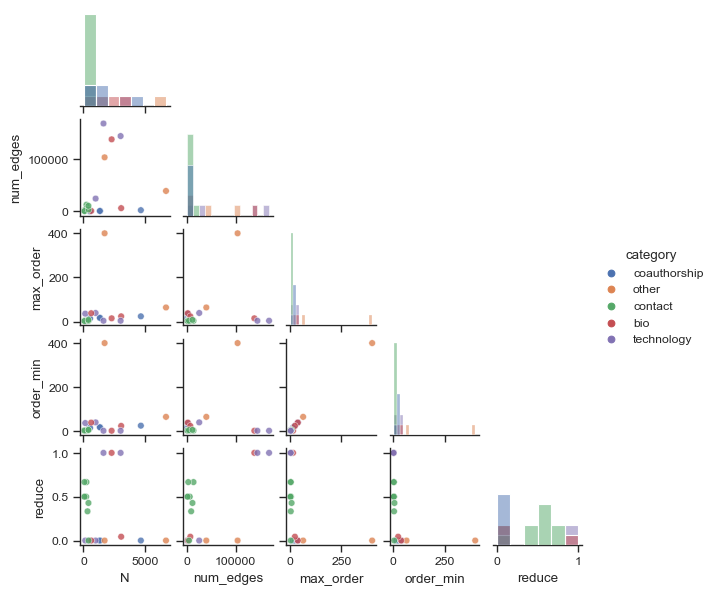

In [173]:
sb.pairplot(
    data=stats_df,
    hue="category",
    height=1.2,
    aspect=1,
    corner=True,
    plot_kws={"alpha": 0.8},
    diag_kind="hist",
)

fig_name = f"reduce_datasets_pairplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")


plt.show()

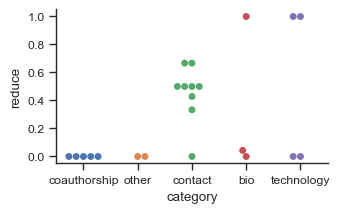

In [169]:
fig, ax = plt.subplots(figsize=(3.5,2))

sb.swarmplot(data=stats_df, y="reduce", x="category", alpha=0.99)

sb.despine()

fig_name = f"reduce_datasets"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

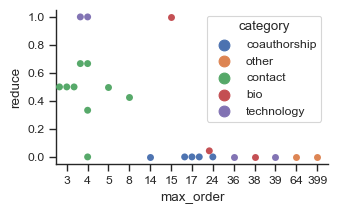

In [172]:
fig, ax = plt.subplots(figsize=(3.5,2))

sb.swarmplot(data=stats_df, y="reduce", x="max_order", hue="category", alpha=0.99)

sb.despine()

fig_name = f"reduce_datasets_vs_maxorder"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

## plot curves

In [155]:
for name in datasets:
    
    #name = "hypertext-conference"
    data = np.load(f"{out_dir}/message_length_{name}.npz")

    message_length = data["message_length"]
    Ds_H = data["KL"]
    lZs_H = data["complexity"]
    orders = data["orders"]
    N = int(data["N"])
    
    ## first plot
    
    fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

    message_length = Ds_H + lZs_H
    ax.plot(orders, message_length, "o-", ms=2, alpha=0.5)

    ax.set_ylabel("Message Length")
    ax.set_xlabel("Max Order")
    ax.set_title("functional complex.")

    # ax.set_title(f"{name} {year}, N={N}")
    ax.set_title(f"{name}, N={N}")

    sb.despine()

    # fig_name = f"message_length_{name}_{year}_rescaled_tauc"
    fig_name = f"message_length_{name}_rescaled_tauc"

    plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
    
    ## second plot
    
    fig, axs = plt.subplots(1, 3, figsize=(4.5, 1.5), sharey=True)

    axs[0].plot(orders, Ds_H, "o-", ms=2, alpha=0.5)
    axs[0].set_title("information")

    axs[1].plot(orders, lZs_H, "o-", ms=2, alpha=0.5)
    axs[1].set_title("complexity")

    axs[2].plot(orders, message_length, "o-", ms=2, alpha=0.5)
    axs[2].set_title("mess. length")


    axs[0].set_ylabel("Message Length")
    axs[0].set_xlabel("Max Order")
    axs[1].set_xlabel("Max Order")
    axs[2].set_xlabel("Max Order")

    order_argmin = np.argmin(message_length)
    order_min = orders[order_argmin]

    axs[2].axvline(order_min, ls="--", c="grey", zorder=-2, alpha=0.4)

    # ax.set_title("functional complex.")

    # ax.set_title(f"{name} {year}, N={N}")
    # fig.suptitle(f"{name}_{year}")
    fig.suptitle(f"{name}")

    sb.despine() 
    plt.subplots_adjust(top=0.65)

    # fig_name = f"message_length_{name}_{year}_rescaled_tauc_full"
    fig_name = f"message_length_{name}_rescaled_tauc_full"

    plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
    
    plt.show()

NameError: name 'H0' is not defined

In [164]:
n = 100

L = np.zeros((n,n))

In [165]:
entropy(L, tau=0.1)

4.60517018598809

In [166]:
np.log(n)

4.605170185988092

In [167]:
penalization(L, tau=0.1)

1.7763568394002505e-15